In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sales = pd.read_csv("https://raw.githubusercontent.com/GerhardTrippen/DataSets/master/sample-salesv2.csv", parse_dates=['date'])
sales.head()
sales.dtypes
sales.describe()
sales['unit price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

In [9]:
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


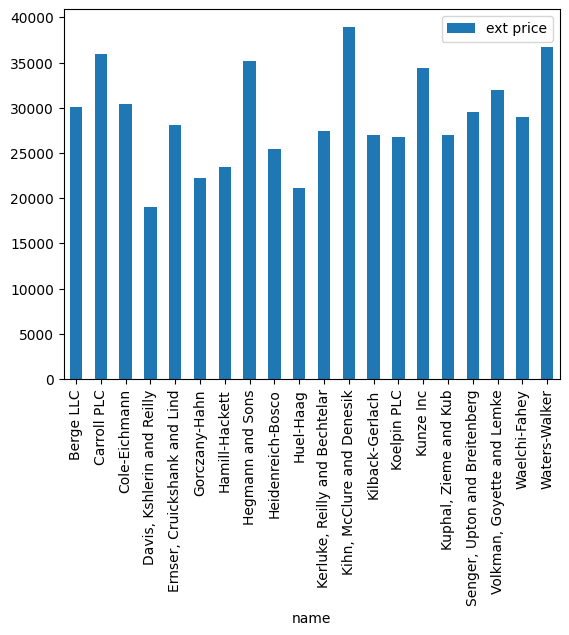

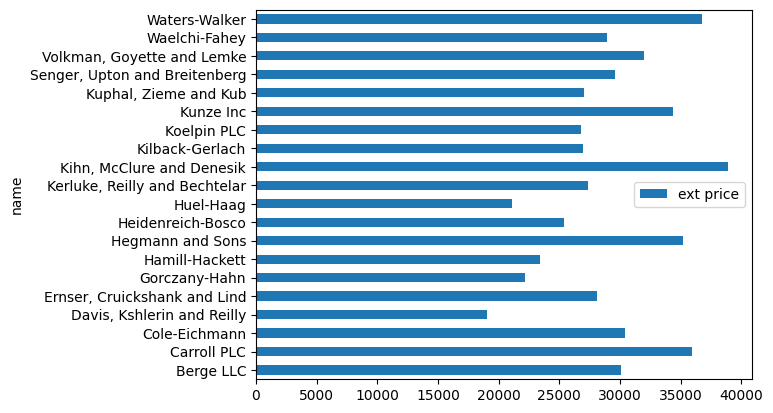

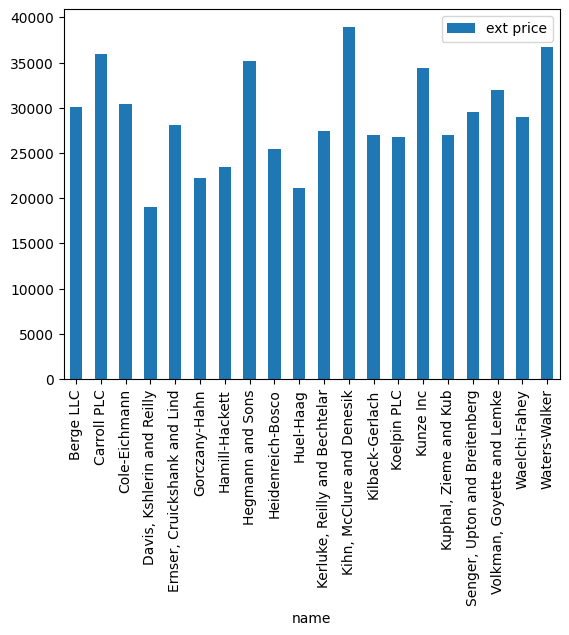

In [8]:
customers = sales[['name','ext price','date']]
customers.head()
customer_group = customers.groupby('name')
customer_group.size()
sales_totals = customer_group.sum()
sales_totals.sort_values('ext price').head()
my_plot = sales_totals.plot(kind='bar')
my_plot = sales_totals.plot(kind='barh')
# identical
my_plot = sales_totals.plot.bar()

Text(0, 0.5, 'Sales ($)')

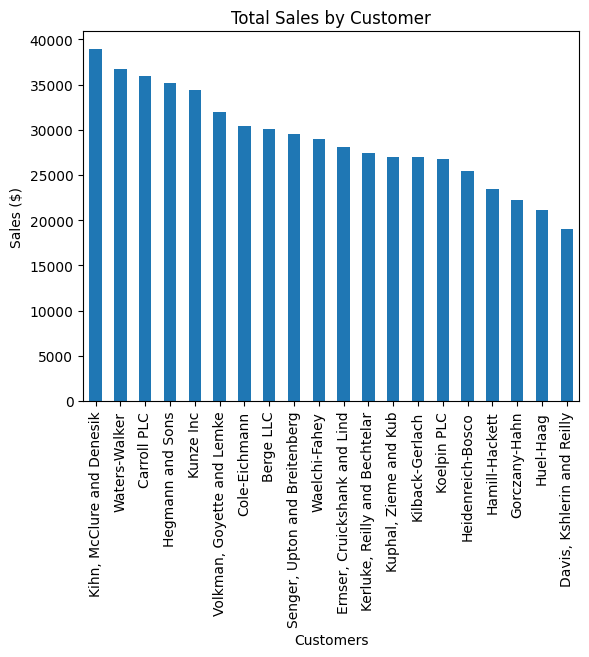

In [10]:
my_plot = sales_totals.sort_values('ext price', 
ascending=False).plot(kind='bar', legend=None, 
title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")

                            name category  ext price                date
0                    Carroll PLC     Belt     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    Shoes    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar    Shirt     289.92 2014-03-01 10:51:24
3                  Waters-Walker    Shirt     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    Shirt    1793.52 2014-01-03 08:14:27
                                     ext price
name                       category           
Berge LLC                  Belt        6033.53
                           Shirt       9670.24
                           Shoes      14361.10
Carroll PLC                Belt        9359.26
                           Shirt      13717.61
                           Shoes      12857.44
Cole-Eichmann              Belt        8112.70
                           Shirt      14528.01
                           Shoes       7794.71
Davis, Kshlerin and Reilly Belt        1604.1

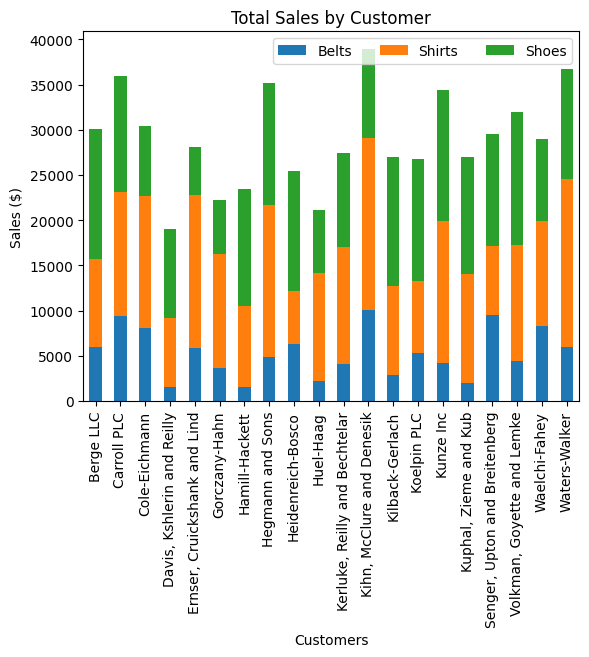

In [12]:
customers = sales[['name', 'category', 'ext price', 'date']]
print(customers.head())
category_group = customers.groupby(['name','category']).sum()
print(category_group.head(10))
category_group = category_group.unstack() # unstack to belt shoes..
print(category_group.head(10))
my_plot = category_group.plot(kind='bar', stacked=True, 
title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")
my_plot.legend(["Belts","Shirts","Shoes"], loc='best', 
ncol=3)

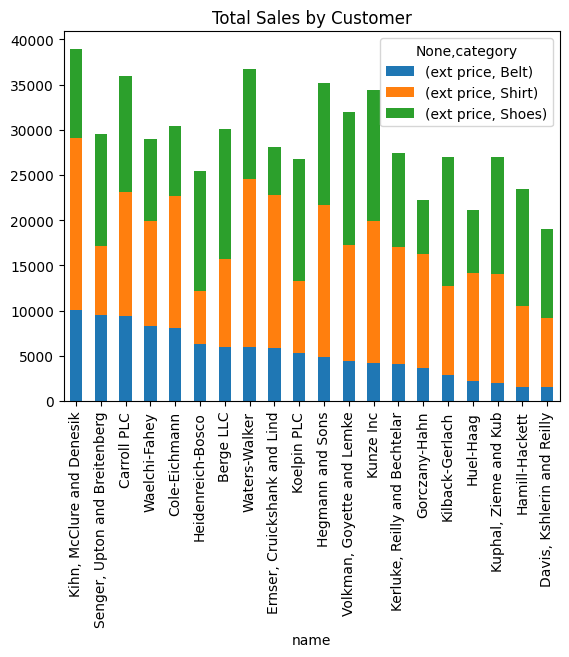

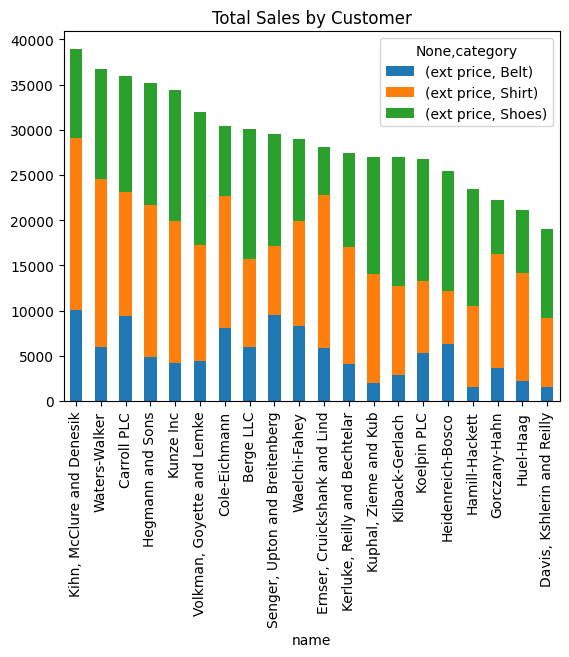

In [16]:
category_group = category_group.sort_values(('ext price', 'Belt'), ascending=False)
category_group.head()
my_plot = category_group.plot(kind='bar', stacked=True, 
title="Total Sales by Customer")
# sort by total without showing total!
category_group['total'] = category_group.sum(axis=1)
category_group = category_group.sort_values('total', 
ascending=False)
category_group.head()
category_group.drop('total', axis=1, inplace=True)
my_plot = category_group.plot(kind='bar', stacked=True, title="Total Sales by Customer")

Text(0, 0.5, 'Number of Orders')

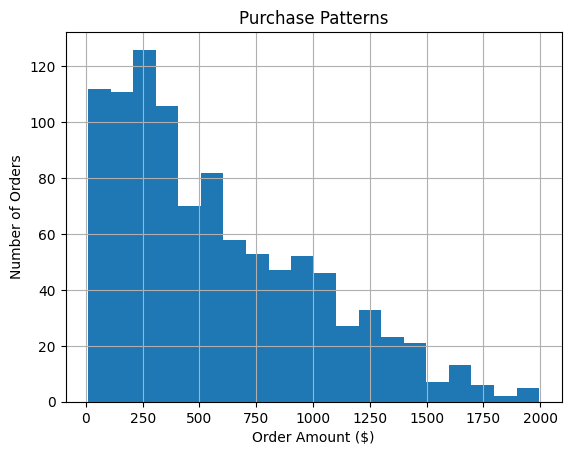

In [18]:
purchase_patterns = sales[['category','ext price','date']]
purchase_patterns.head()
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
# done many times now, 
# but should always be done to make figure self-explanatory
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount ($)")
purchase_plot.set_ylabel("Number of Orders")

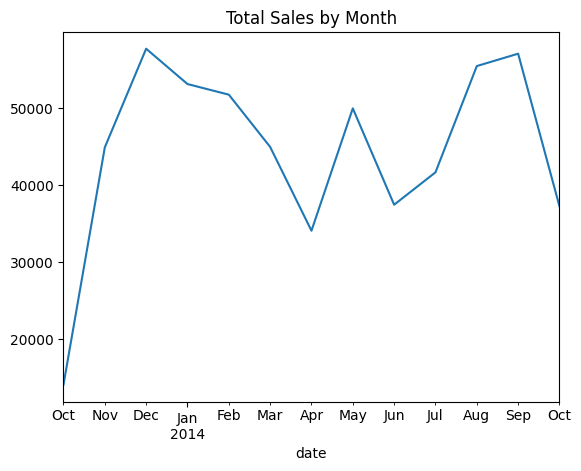

In [19]:
purchase_patterns = purchase_patterns.set_index('date')
purchase_patterns.head()
# sorted by time
purchase_patterns.sort_index()
# resampled by months
purchase_plot = purchase_patterns.resample('M').sum().plot(title="Total Sales by Month", legend=None)
# save the figure
fig = purchase_plot.get_figure()
fig.savefig("total-sales.png")

(0.0, 28565.6885)

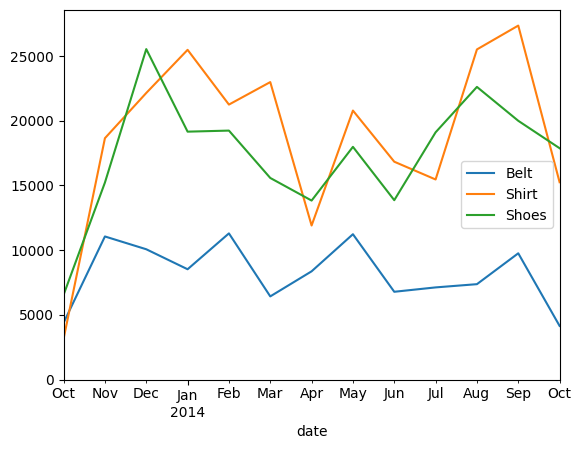

In [20]:
fig, ax = plt.subplots()
# key gives the group name (i.e., category), data gives the actual values
for key, data in purchase_patterns.groupby('category'):
    data.resample('M').sum().plot(y='ext price', ax=ax, label=key)
# change y range to start from 0 with matplotlib
ax.set_ylim(bottom=0)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'Berge LLC'),
  Text(2, 0, 'Carroll PLC'),
  Text(3, 0, 'Cole-Eichmann'),
  Text(4, 0, 'Davis, Kshlerin and Reilly'),
  Text(5, 0, 'Ernser, Cruickshank and Lind'),
  Text(6, 0, 'Gorczany-Hahn'),
  Text(7, 0, 'Hamill-Hackett'),
  Text(8, 0, 'Hegmann and Sons'),
  Text(9, 0, 'Heidenreich-Bosco'),
  Text(10, 0, 'Huel-Haag'),
  Text(11, 0, 'Kerluke, Reilly and Bechtelar'),
  Text(12, 0, 'Kihn, McClure and Denesik'),
  Text(13, 0, 'Kilback-Gerlach'),
  Text(14, 0, 'Koelpin PLC'),
  Text(15, 0, 'Kunze Inc'),
  Text(16, 0, 'Kuphal, Zieme and Kub'),
  Text(17, 0, 'Senger, Upton and Breitenberg'),
  Text(18, 0, 'Volkman, Goyette and Lemke'),
  Text(19, 0, 'Waelchi-Fahey'),
  Text(20, 0, 'Waters-Walker')])

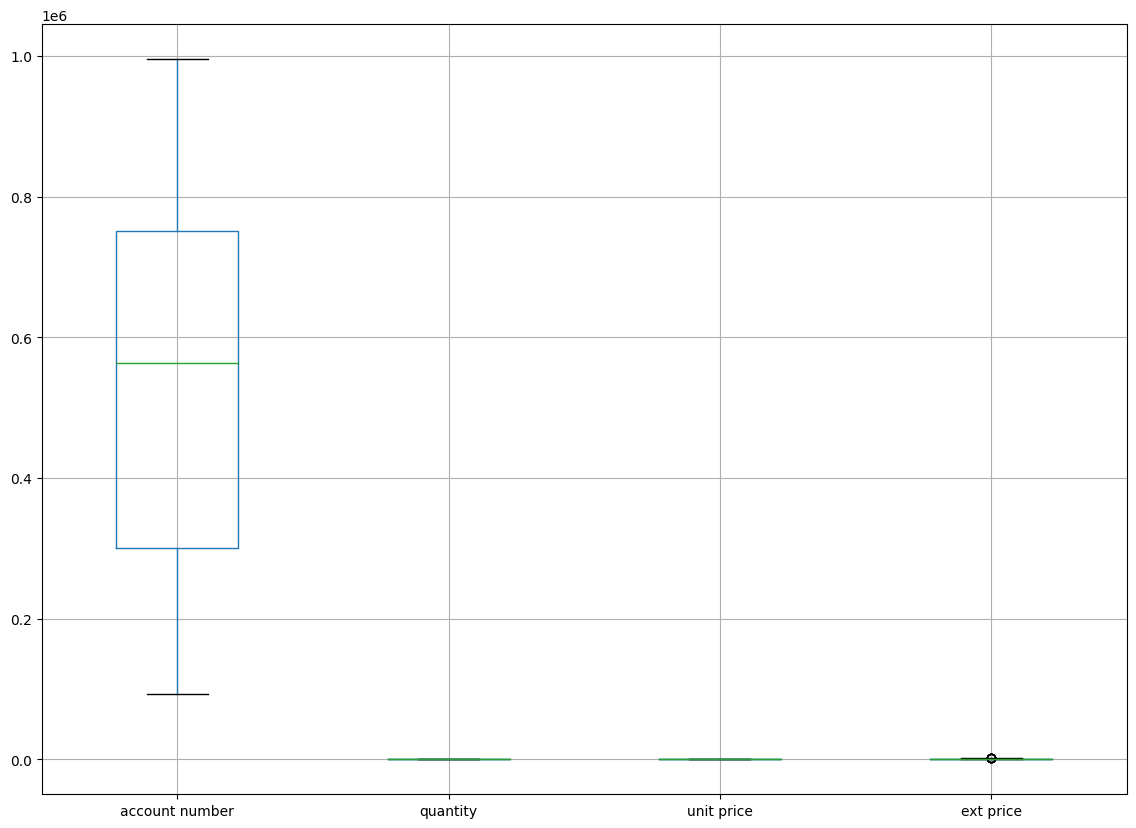

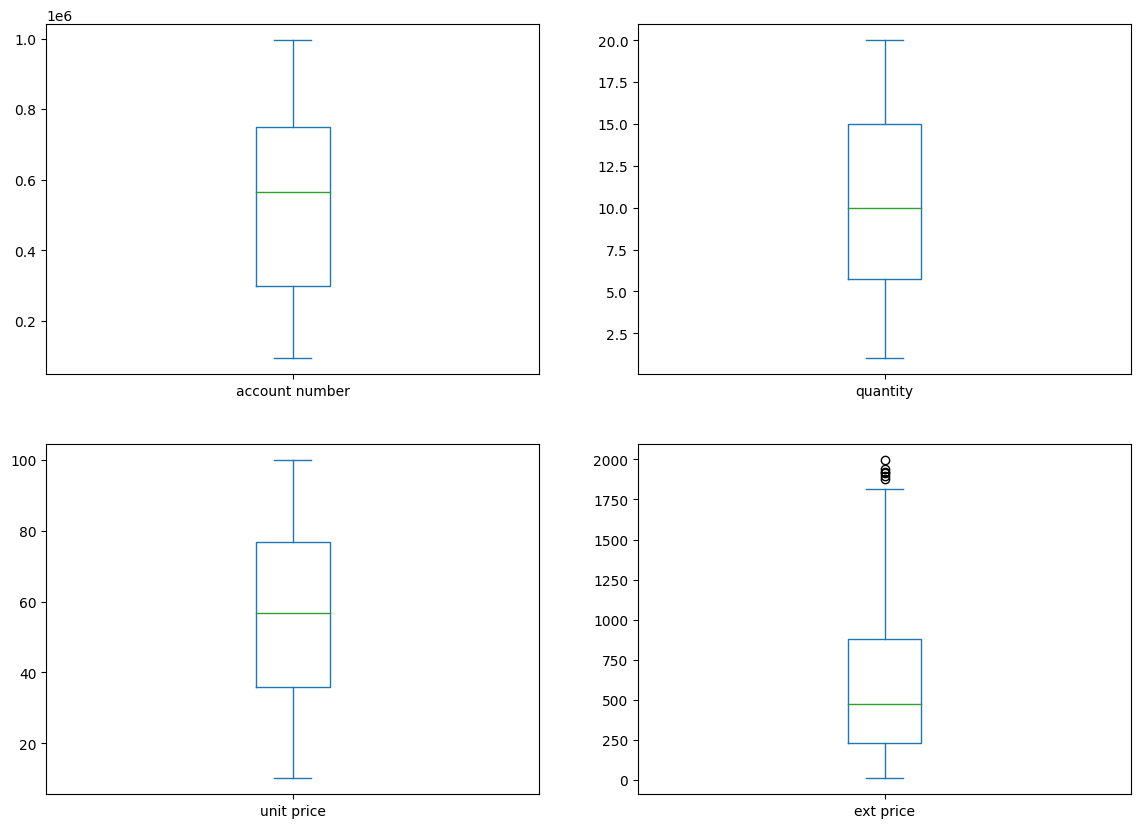

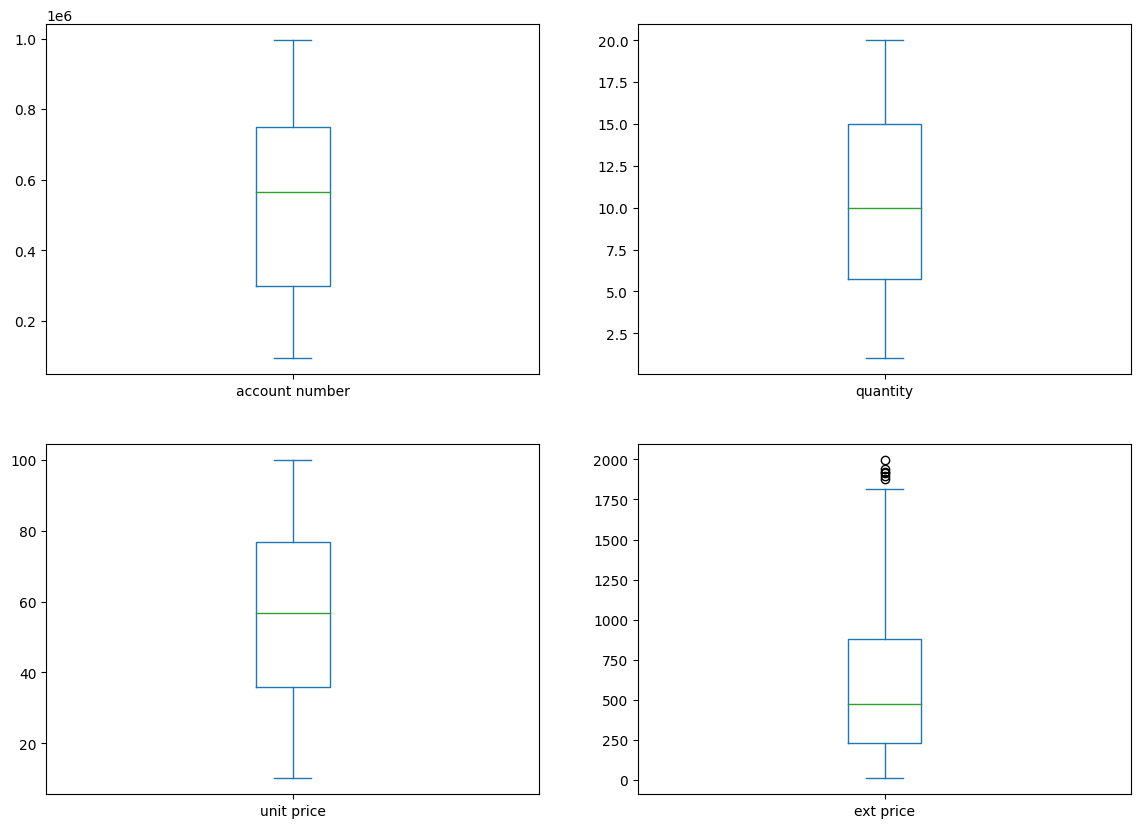

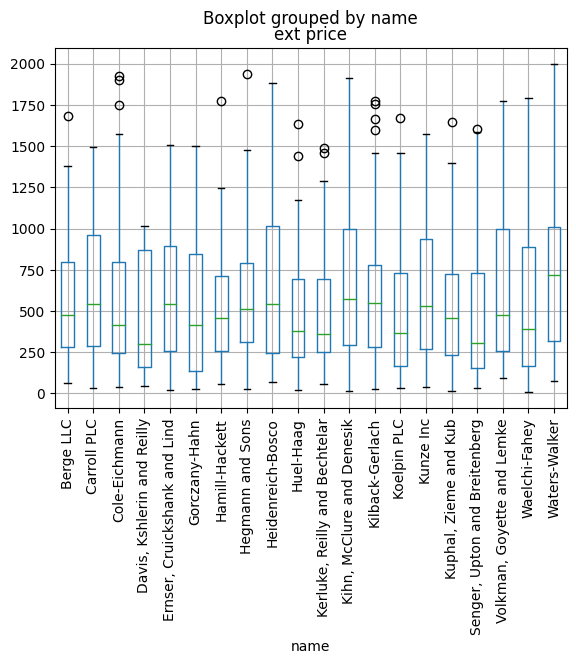

In [22]:
# Box and Whisker Plots
sales.boxplot(figsize=(14,10))    # Not very useful!
# Four boxplots in one figure with individual scales
sales.plot(figsize=(14,10), kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# This was not working for some time in some pandas versions because of the date column, so:
sales.drop('date',axis=1).plot(figsize=(14,10), kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# Individual boxplots for all names
sales.boxplot(column="ext price", by="name")
plt.xticks(rotation='vertical')

array([[<AxesSubplot:title={'center':'Berge LLC'}>,
        <AxesSubplot:title={'center':'Carroll PLC'}>,
        <AxesSubplot:title={'center':'Cole-Eichmann'}>,
        <AxesSubplot:title={'center':'Davis, Kshlerin and Reilly'}>],
       [<AxesSubplot:title={'center':'Ernser, Cruickshank and Lind'}>,
        <AxesSubplot:title={'center':'Gorczany-Hahn'}>,
        <AxesSubplot:title={'center':'Hamill-Hackett'}>,
        <AxesSubplot:title={'center':'Hegmann and Sons'}>],
       [<AxesSubplot:title={'center':'Heidenreich-Bosco'}>,
        <AxesSubplot:title={'center':'Huel-Haag'}>,
        <AxesSubplot:title={'center':'Kerluke, Reilly and Bechtelar'}>,
        <AxesSubplot:title={'center':'Kihn, McClure and Denesik'}>],
       [<AxesSubplot:title={'center':'Kilback-Gerlach'}>,
        <AxesSubplot:title={'center':'Koelpin PLC'}>,
        <AxesSubplot:title={'center':'Kunze Inc'}>,
        <AxesSubplot:title={'center':'Kuphal, Zieme and Kub'}>],
       [<AxesSubplot:title={'center':'Seng

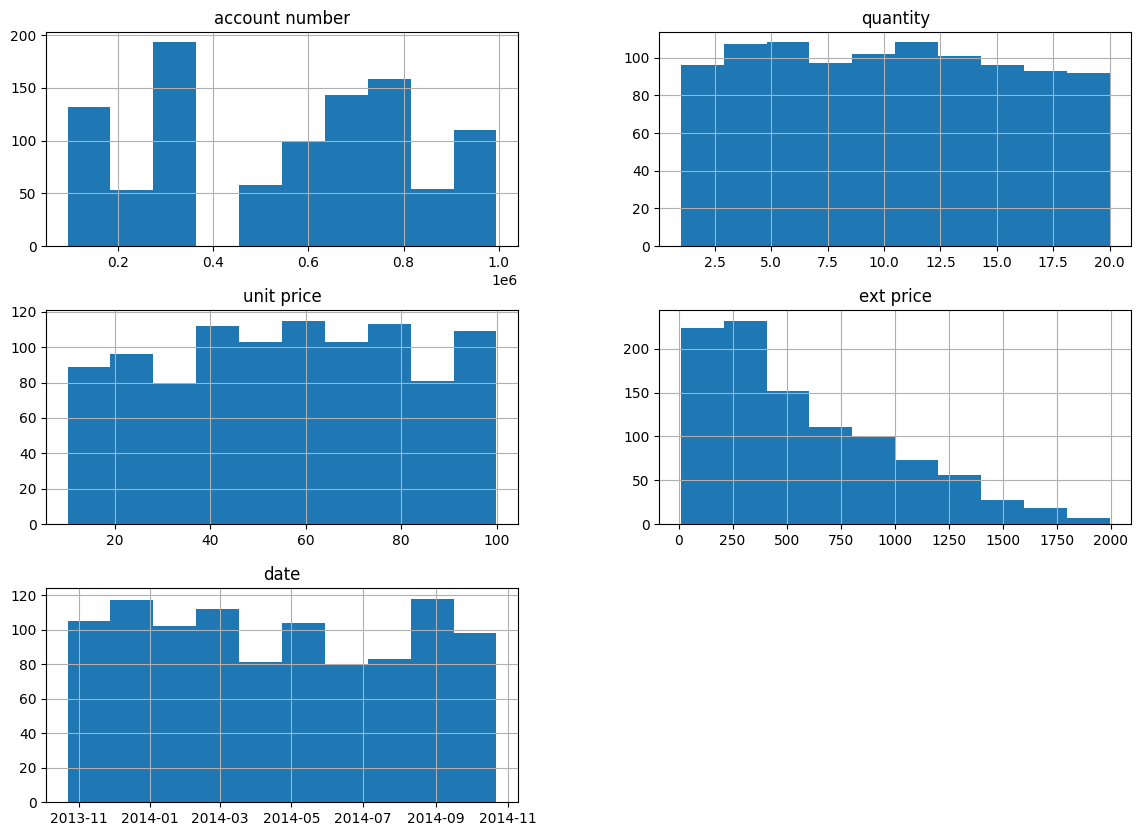

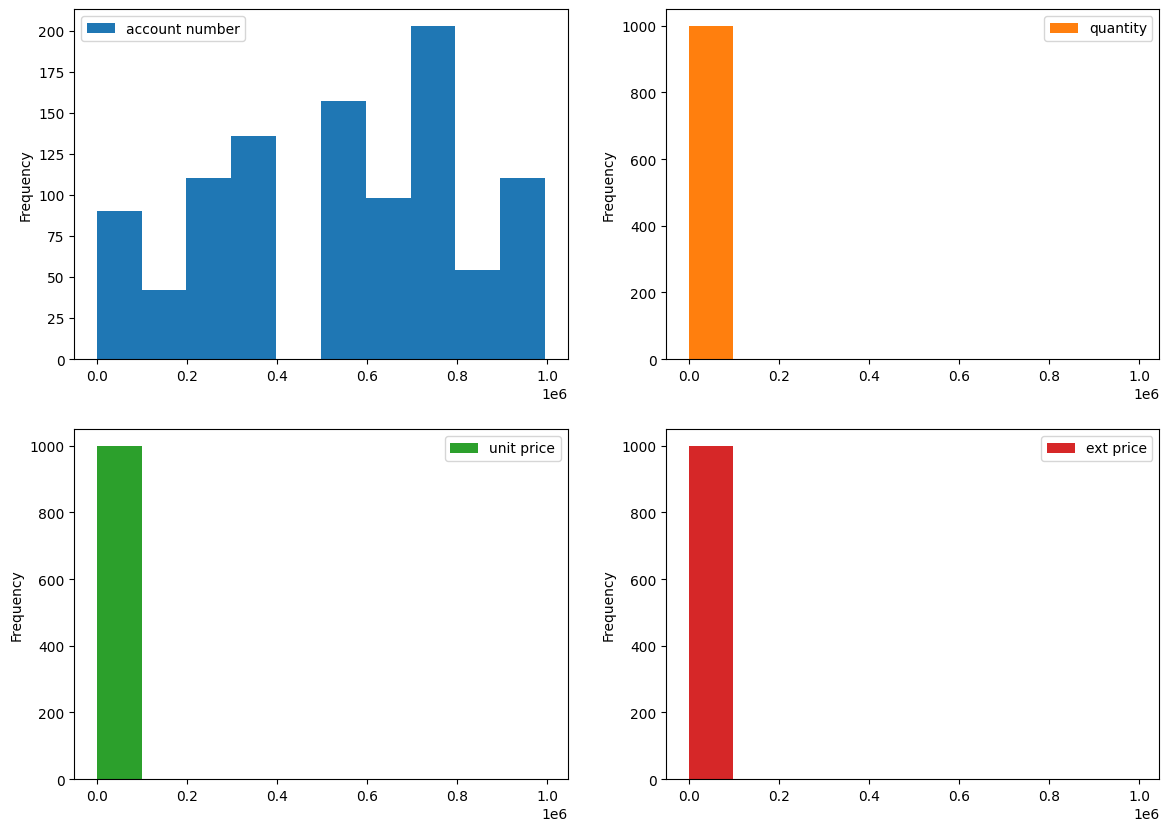

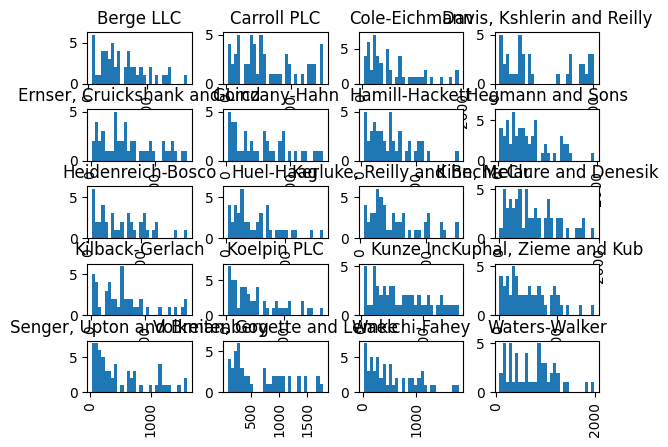

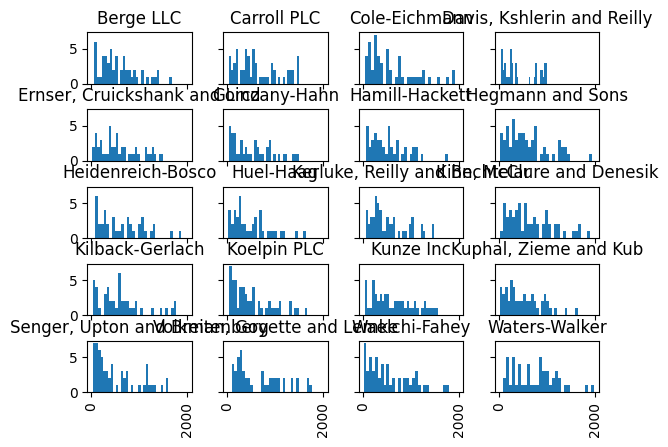

In [23]:
# Histograms
sales.hist(figsize=(14,10))
# for individual variables in one plot
sales.drop('date',axis=1).plot(figsize=(14,10), 
kind='hist', subplots=True, layout=(2,2), sharex=False, 
sharey=False)  # "ignored", unfortunately
# individual plots for individual customers
sales.hist(column="ext price", by="name", bins=30)
# same axes for comparison
sales.hist(column="ext price", by="name", bins=30, 
sharex=True, sharey=True)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
# Load CSV using pandas
import pandas as pd
from pandas import read_csv
# AirBnB website visitors
filename = 'visitors.csv'
visitors = read_csv(filename, index_col='id_visitor')
print(visitors.head())
print(visitors.shape)
print(visitors.head())
print(visitors.dtypes)

                                      ts_mins  did_search  sent_message  \
id_visitor                                                                
0331fa39-455f-4f47-9db2-18ce37ee90e4    247.0           7             0   
04862ee0-26d8-4f8b-a69d-9a5821d08021     59.0           5             1   
04b8e876-3afc-41cf-aff9-50b64b4e2ae3    533.0          18            13   
060a3cd7-a494-4b49-8551-c22c8caacbd7    269.0           4             9   
06984869-ca80-40f2-b9ed-09676d178a80    291.0           5             8   

                                      sent_booking_request  
id_visitor                                                  
0331fa39-455f-4f47-9db2-18ce37ee90e4                     0  
04862ee0-26d8-4f8b-a69d-9a5821d08021                     0  
04b8e876-3afc-41cf-aff9-50b64b4e2ae3                     3  
060a3cd7-a494-4b49-8551-c22c8caacbd7                     1  
06984869-ca80-40f2-b9ed-09676d178a80                     0  
(630, 4)
                                      

ts_mins                    AxesSubplot(0.125,0.53;0.352273x0.35)
did_search              AxesSubplot(0.547727,0.53;0.352273x0.35)
sent_message               AxesSubplot(0.125,0.11;0.352273x0.35)
sent_booking_request    AxesSubplot(0.547727,0.11;0.352273x0.35)
dtype: object

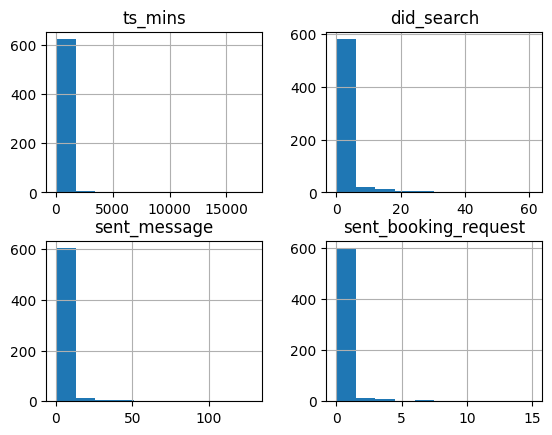

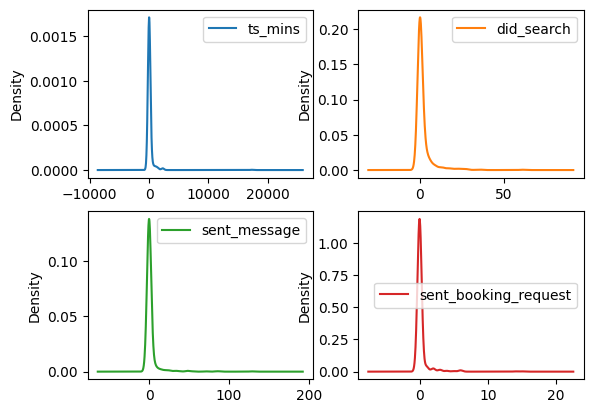

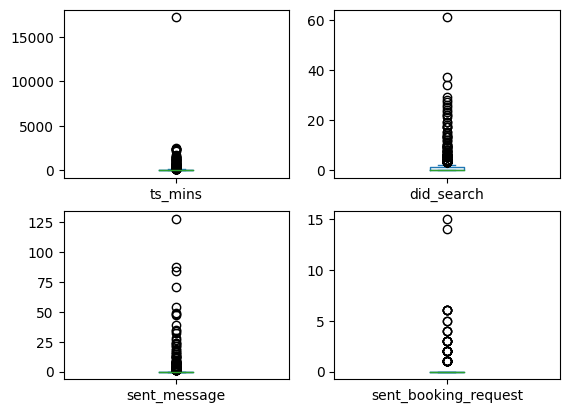

In [25]:
# Univariate Histograms
visitors.hist()
# Univariate Density Plots
visitors.plot(kind='density', subplots=True, 
layout=(2,2), sharex=False)
# Box and Whisker Plots
visitors.plot(kind='box', subplots=True, layout=(2,2), 
sharex=False, sharey=False)

[Text(0, 0, 'ts_mins'),
 Text(0, 1, 'did_search'),
 Text(0, 2, 'sent_message'),
 Text(0, 3, 'sent_booking_request')]

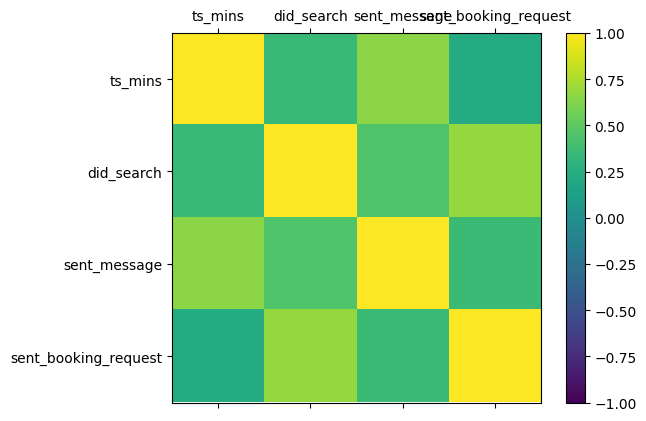

In [26]:
# correlation matrix
correlations = visitors.corr()
# plot correlation matrix (generic)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
# change the tick labels
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(visitors.columns)
ax.set_yticklabels(visitors.columns)

array([[<AxesSubplot:xlabel='ts_mins', ylabel='ts_mins'>,
        <AxesSubplot:xlabel='did_search', ylabel='ts_mins'>,
        <AxesSubplot:xlabel='sent_message', ylabel='ts_mins'>,
        <AxesSubplot:xlabel='sent_booking_request', ylabel='ts_mins'>],
       [<AxesSubplot:xlabel='ts_mins', ylabel='did_search'>,
        <AxesSubplot:xlabel='did_search', ylabel='did_search'>,
        <AxesSubplot:xlabel='sent_message', ylabel='did_search'>,
        <AxesSubplot:xlabel='sent_booking_request', ylabel='did_search'>],
       [<AxesSubplot:xlabel='ts_mins', ylabel='sent_message'>,
        <AxesSubplot:xlabel='did_search', ylabel='sent_message'>,
        <AxesSubplot:xlabel='sent_message', ylabel='sent_message'>,
        <AxesSubplot:xlabel='sent_booking_request', ylabel='sent_message'>],
       [<AxesSubplot:xlabel='ts_mins', ylabel='sent_booking_request'>,
        <AxesSubplot:xlabel='did_search', ylabel='sent_booking_request'>,
        <AxesSubplot:xlabel='sent_message', ylabel='sent_book

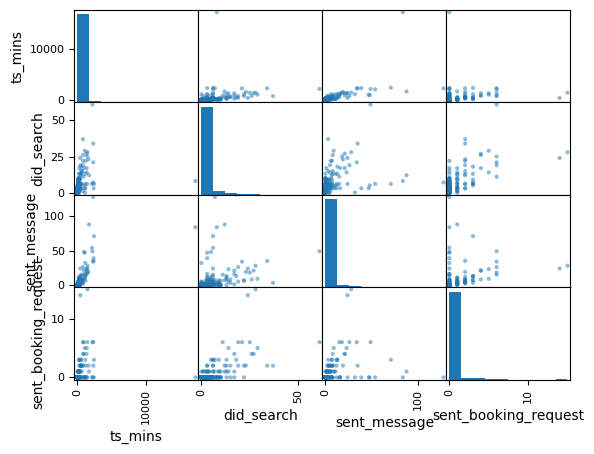

In [27]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(visitors)